# Wstęp

Testy nigdy nie dadzą pełnej gwarancji.

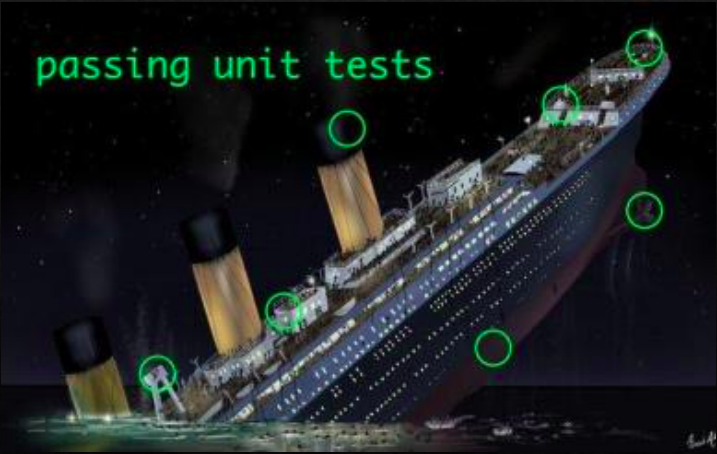

W takim razie po co testować?

Z perspektywy **product ownera**, żeby zmniejszyć koszty wytwarzania oprogramowania, bo czas to pieniądz, a nieplanowane przerwy w działaniu oprogramowania często wiążą się z dużymi stratami finansowymi.

Z perspektywy **dewelopera**, żeby zwiększyć komfort wytwarzania oprogramowania i zmniejszyć prawdopobieństwo wprowadzenia błędu.

# Rodzaje testów na przykładach

## 📋 Cele
- Poznanie różnych rodzajów testów
- Zrozumienie kiedy stosować który typ testu

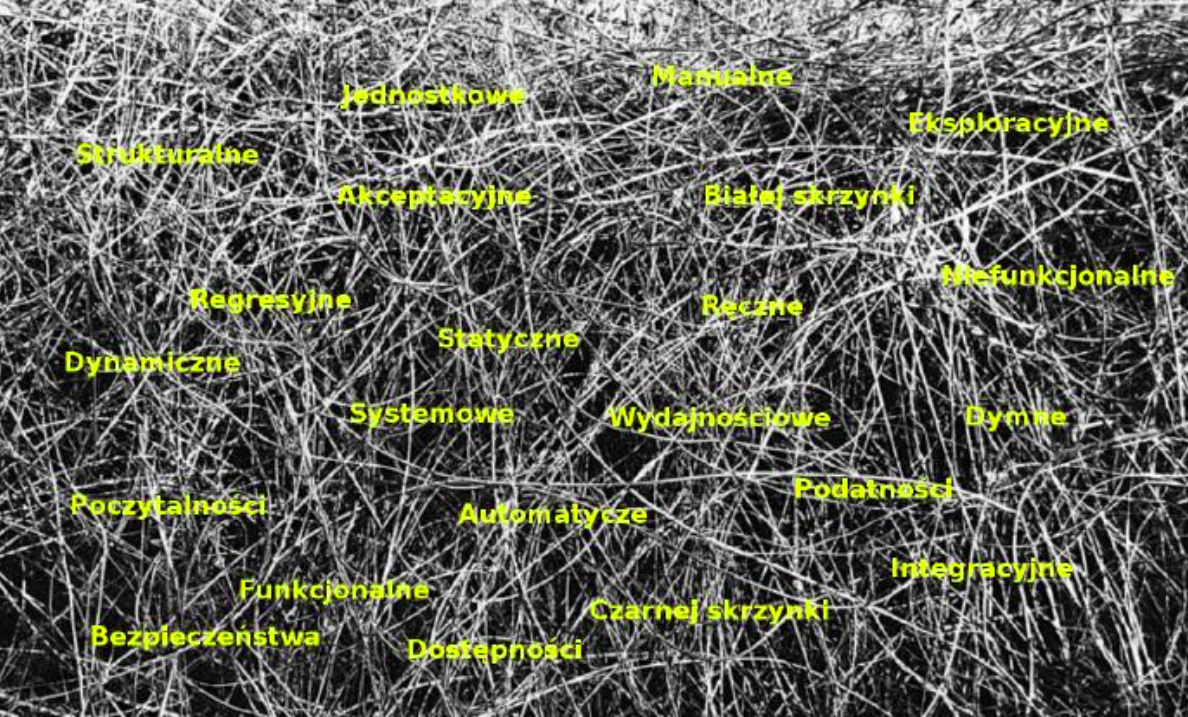


## 🔍 Piramida testów
```
     /\     UI Tests (E2E)
    /  \    
   /____\   Integration Tests
  /      \  
 /________\ Unit Tests
```

**Zasada:** Więcej testów jednostkowych, mniej testów integracyjnych, najmniej testów UI.

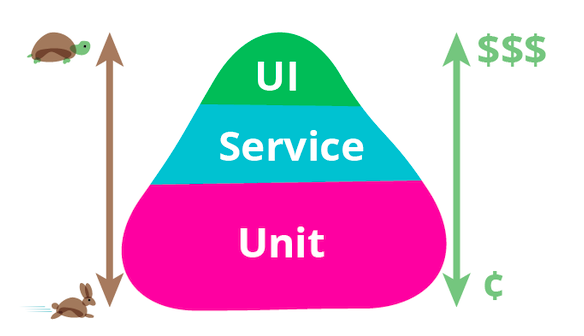

https://martinfowler.com/bliki/TestPyramid.html

## 1. Testy jednostkowe (Unit Tests)

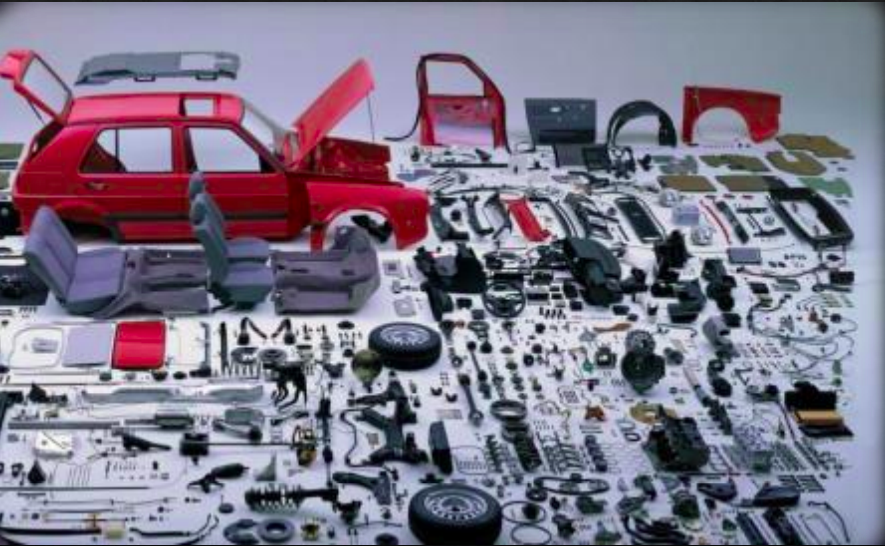

**Cel:** Testowanie pojedynczych funkcji, metod lub klas w izolacji.

**Charakterystyka:**
- Szybkie (< 1ms)
- Niezależne od zewnętrznych zasobów
- Testują jedną rzecz na raz

**F.I.R.S.T**

* **F**ast
* **I**ndependent
* **R**epeatable
* **S**elf-validating
* **T**imely (na czas, a nie na koniec)

In [ ]:
# Przykład funkcji do testowania
def add(a, b):
    """Dodaje dwie liczby."""
    return a + b

def divide(a, b):
    """Dzieli liczbę a przez b."""
    if b == 0:
        raise ValueError("Nie można dzielić przez zero")
    return a / b


In [ ]:
# Test jednostkowy
def test_add():
    assert add(2, 3) == 5
    assert add(-1, 1) == 0
    assert add(0, 0) == 0

def test_divide():
    assert divide(10, 2) == 5.0
    assert divide(9, 3) == 3.0
    
def test_divide_by_zero():
    try:
        divide(5, 0)
        assert False, "Powinien rzucić wyjątek"
    except ValueError as e:
        assert str(e) == "Nie można dzielić przez zero"


In [ ]:
# Uruchomienie testów
test_add()
test_divide()
test_divide_by_zero()
print("✅ Wszystkie testy jednostkowe przeszły")

## 2. Testy dymne (Smoke Tests)

**Cel:** Szybka weryfikacja czy podstawowe funkcjonalności działają.

**Charakterystyka:**
- Sprawdzają "czy system w ogóle działa"
- Uruchamiane po deployment
- Szybkie i powierzchowne

## 3. Analiza statyczna

**Cel:** Analiza kodu bez jego uruchamiania - szukanie potencjalnych błędów (składniowych, stylu, typów, bezpieczeństwa).

**Narzędzia:** pylint, flake8, mypy, bandit, blake, ruff

## 4. Testy mutacyjne (Mutation Tests)

**Cel:** Sprawdzenie jakości testów poprzez wprowadzanie drobnych zmian (mutacji) w kodzie.

**Zasada:** Jeśli test nie wykrywa mutacji, znaczy że jest niewystarczający.

## 5. Testy integracyjne

**Cel:** Testowanie współpracy między różnymi modułami lub komponentami.

**Charakterystyka:**
- Sprawdzają przepływ danych między komponentami
- Wolniejsze niż testy jednostkowe
- Mogą używać rzeczywistych zasobów (bazy danych, API)

## 6. Testy funkcjonalne

**Cel:** Sprawdzenie czy system spełnia wymagania biznesowe.

**Charakterystyka:**
- Testują funkcjonalności z perspektywy użytkownika
- Ignorują implementację, skupiają się na wynikach
- Często opisywane w języku biznesowym

## 7. Testy obciążeniowe (Performance/Load Tests)

**Cel:** Sprawdzenie jak system zachowuje się pod obciążeniem.

**Typy:**
- Load Testing - normalne obciążenie
- Stress Testing - zwiększone obciążenie
- Spike Testing - nagłe skoki obciążenia
- Volume Testing - duże ilości danych

## 8. Testy bezpieczeństwa

**Cel:** Sprawdzenie odporności na ataki i luki bezpieczeństwa.

**Przykłady:**
- SQL Injection
- XSS (Cross-Site Scripting)
- Authentication/Authorization
- Input validation

## 9. Testy interfejsu (UI Tests)

**Cel:** Sprawdzenie interfejsu użytkownika - czy wszystkie elementy działają poprawnie.

**Narzędzia:** Selenium, Playwright, Cypress

## 10. Testy regresyjne

**Cel:** Sprawdzenie czy nowe zmiany nie zepsuły istniejących funkcjonalności.

**Charakterystyka:**
- Uruchamiane po każdej zmianie
- Często automatyzowane w CI/CD
- Obejmują wszystkie krytyczne funkcjonalności

## 📝 Podsumowanie rodzajów testów

| Rodzaj testu | Cel | Szybkość | Kiedy używać |
|-------------|-----|-----------|---------------|
| **Jednostkowe** | Testowanie pojedynczych funkcji | Bardzo szybkie | Zawsze, podstawa testowania |
| **Dymne** | Sprawdzenie czy system działa | Szybkie | Po deployment, CI/CD |
| **Analiza statyczna** | Znajdowanie błędów w kodzie | Szybkie | Podczas pisania kodu |
| **Mutacyjne** | Sprawdzenie jakości testów | Wolne | Okresowo, ocena testów |
| **Regresyjne** | Wykrycie zepsutych funkcji | Różne | Po każdej zmianie |
| **Funkcjonalne** | Weryfikacja wymagań biznesowych | Średnie | Po implementacji funkcji |
| **Interfejsu** | Testowanie UI/UX | Wolne | Przed wydaniem |
| **Obciążeniowe** | Sprawdzenie wydajności | Wolne | Przed wydaniem |
| **Integracyjne** | Współpraca komponentów | Średnie | Po integracji modułów |
| **Bezpieczeństwa** | Wykrycie luk bezpieczeństwa | Różne | Regularnie |

## 🎯 Praktyczne wskazówki

1. **Zacznij od testów jednostkowych** - to fundament
2. **Dodaj testy integracyjne** dla krytycznych przepływów
3. **Automatyzuj testy regresyjne** w CI/CD
4. **Używaj testów dymnych** dla szybkiej weryfikacji
5. **Testy UI** tylko dla kluczowych scenariuszy
6. **Testy bezpieczeństwa** dla aplikacji publicznych
7. **Testy obciążeniowe** przed dużym ruchem